### REST API

We collect the data by using the correct URI and adding "?limit=1000&nobelPrizeCategory=phy" to be able to collect only the data about nobel prizes in physiques and to be sure that we collect the data from every year. 

In [153]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import requests

URI = "https://api.nobelprize.org/2.1/nobelPrizes?limit=1000&nobelPrizeCategory=phy"
response = requests.get(URI)

data = response.json()

The variable data will contain a dictionary, with the key nobelPrizes. The value of nobelPrizes will be a list where every element is a different nobel price. We loop through all the prizes and select the motivation in english from each prize and store these in the list eng_motivations. 

In [92]:
eng_motivations = []

for prize in data.get('nobelPrizes'):
    if prize.get('laureates'): 
        eng_motivations.append(prize.get('laureates')[0].get('motivation').get('en'))

With the code from "https://www.geeksforgeeks.org/generating-word-cloud-python/" as guideline so do we create a wordcloud using the words from the strings in eng_motivations (except the stopwords). 

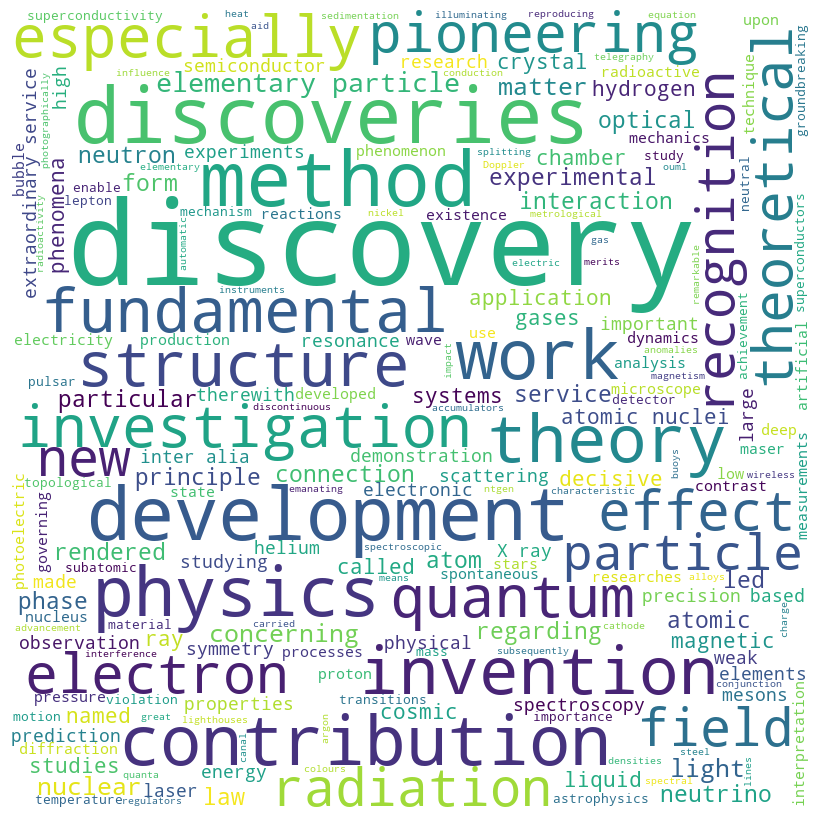

In [93]:
stopwords = set(STOPWORDS)
words = ''

for motivation in eng_motivations:
    tokens = motivation.split()
    for i in range(len(tokens)):
        tokens[i].lower()
    words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Web scraping

We start by creating a BeautifulSoup object html for each of the three pages on the webside. From each of these so will we find the part of the code containing the information about the books and we loop thorugh this part to select the code for each book and using this as argument to the function extract_book_info. We use extract_book_info to select the upc, title, price and rating for each book and we store these values in the lists upc_list, title_list, price_list and rating_list. We use these lists to create a dataframe, which we can see downbelow. 

In [152]:
from bs4 import BeautifulSoup

upc_list = []
title_list = []
price_list = []
rating_list = []

def extract_book_info(book):
    book_url = book.h3.a["href"]
    r = requests.get(f"https://books.toscrape.com/catalogue/{book_url}")
    html = BeautifulSoup(r.content)

    upc = html.find('table', class_ = 'table table-striped').tr.td.text
    upc_list.append(upc)
    
    title = html.find('div', class_ = 'col-sm-6 product_main').h1.text
    title_list.append(title)

    price = html.find('p', class_ = 'price_color').text
    price_list.append(price)
    
    rating = html.find('p', class_ = 'star-rating')['class'][1]
    rating_list.append(rating)

url = "https://books.toscrape.com/catalogue/page-{}.html"
for page in range(1,4):
    r = requests.get(url.format(page))
    html = BeautifulSoup(r.content)
    for book in html.find_all("article"):
        extract_book_info(book)

df = pd.DataFrame({'upc':upc_list, 'title':title_list, 'price':price_list, 'rating':rating_list})
df.head(5)

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
